In [ ]:
pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

**#CODEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE********

* * > > > # ******update codeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images(path):
    images = []
    labels = []
    label_map = {
        "TopLeft": 0,
        "TopCenter": 1,
        "TopRight": 2,
        "MiddleLeft": 3,
        "MiddleRight": 4,
        "BottomLeft": 5,
        "BottomCenter": 6,
        "BottomRight": 7
    }
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            label = label_map.get(folder, -1)
            if label != -1:
                for file in os.listdir(os.path.join(path, folder)):
                    image_path = os.path.join(path, folder, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
                    images.append(image.flatten())  # Flatten image and append to images list
                    labels.append(label)  # Append label to labels list
    return np.array(images), np.array(labels)

# Load and preprocess the training dataset
X_train, y_train = load_images("/kaggle/input/eye-gaze-detection/ImprovementSet/ImprovementSet/ImprovementSet")

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("test Accuracy:", accuracy)

test Accuracy: 0.8688275862068966


In [2]:
from joblib import dump

# Save the trained SVM model
dump(svm, 'svm_model_eye.joblib')

['svm_model_eye.joblib']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.6 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3301371 sha256=12b1a66d8c11d68beb5919b3e01677eab0ff8a6038fb7a8db43a0c294d0a7559
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib
Frame 1 - Face 1 - Classification Result: MiddleLeft
Frame 2 - Face 1 - Classification Result: MiddleLeft
Frame 3 - Face 1 - Classification Result: MiddleLeft
Frame 4 - Face 1 - Classification Result: MiddleLeft
Frame 5 - Face 1 - Classification Result: MiddleLeft
Frame 6 - Face 1 - Classification Result: MiddleLeft
Frame 7 - Face 1 - Classification Result: MiddleLeft
Frame 8 - Face 1 - Classification Result: MiddleLeft
Frame 9 - Face 1 - Classification Result: MiddleLeft
Frame

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

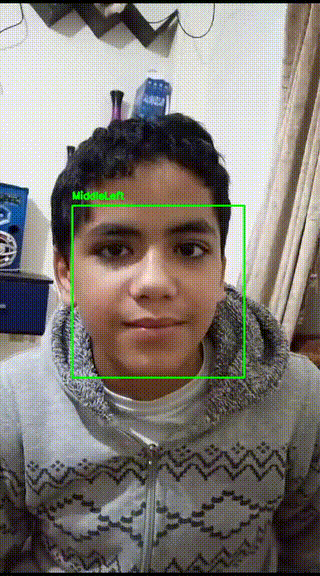

In [4]:
!pip install dlib
import cv2
import dlib
import numpy as np
from joblib import load
from IPython.display import Image, display
import os

# Load the saved SVM model
model_path = "/kaggle/working/svm_model_eye.joblib"
svm = load(model_path)

# Load the face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")

# Path to the input video
video_path = "/kaggle/input/khaledddddddddddd/WhatsApp Video 2024-02-17 at 11.45.03 PM.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Create a VideoWriter object to save the annotated frames as a video
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/kaggle/working/annotated_video.avi', fourcc, fps, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Read the video frame by frame
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = detector(gray)

    for idx, face in enumerate(faces):
        # Get the landmarks for the face
        landmarks = predictor(gray, face)
        
        # Get the points for the left eye
        left_eye_pts = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)]
        left_eye_pts = np.array(left_eye_pts)
        
        # Find the bounding box for the left eye
        left_eye_x, left_eye_y, left_eye_w, left_eye_h = cv2.boundingRect(left_eye_pts)
        
        # Crop the left eye region from the frame
        left_eye_image = gray[left_eye_y:left_eye_y+left_eye_h, left_eye_x:left_eye_x+left_eye_w]
        
        # Resize the left eye image to 100x100 pixels
        left_eye_image_resized = cv2.resize(left_eye_image, (100, 100))
        
        # Flatten the left eye image for prediction
        left_eye_flattened = left_eye_image_resized.flatten()
        
        # Make a prediction using the loaded SVM model
        prediction = svm.predict([left_eye_flattened])[0]
        
        # Map the predicted label to its corresponding class
        label_map = {
            0: "TopLeft",
            1: "TopCenter",
            2: "TopRight",
            3: "MiddleLeft",
            4: "MiddleRight",
            5: "BottomLeft",
            6: "BottomCenter",
            7: "BottomRight"
        }
        predicted_class = label_map[prediction]
        
        # Display the predicted class on the frame
        if predicted_class not in label_map.values():
            text = "Not specified"
        else:
            text = predicted_class
        
        cv2.putText(frame, text, (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.rectangle(frame, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

        # Print the classification result for the current face
        print(f"Frame {int(cap.get(cv2.CAP_PROP_POS_FRAMES))} - Face {idx + 1} - Classification Result: {text}")

    # Save the annotated frame
    out.write(frame)

# Release the VideoWriter object
out.release()

# Convert the annotated video to an animated GIF using an external tool (e.g., ffmpeg)
os.system('ffmpeg -i /kaggle/working/annotated_video.avi -vf "fps=10,scale=320:-1:flags=lanczos" /kaggle/working/annotated_video.gif')

# Display the animated GIF
display(Image("/kaggle/working/annotated_video.gif"))


Face 1 - Classification Result: BottomCenter


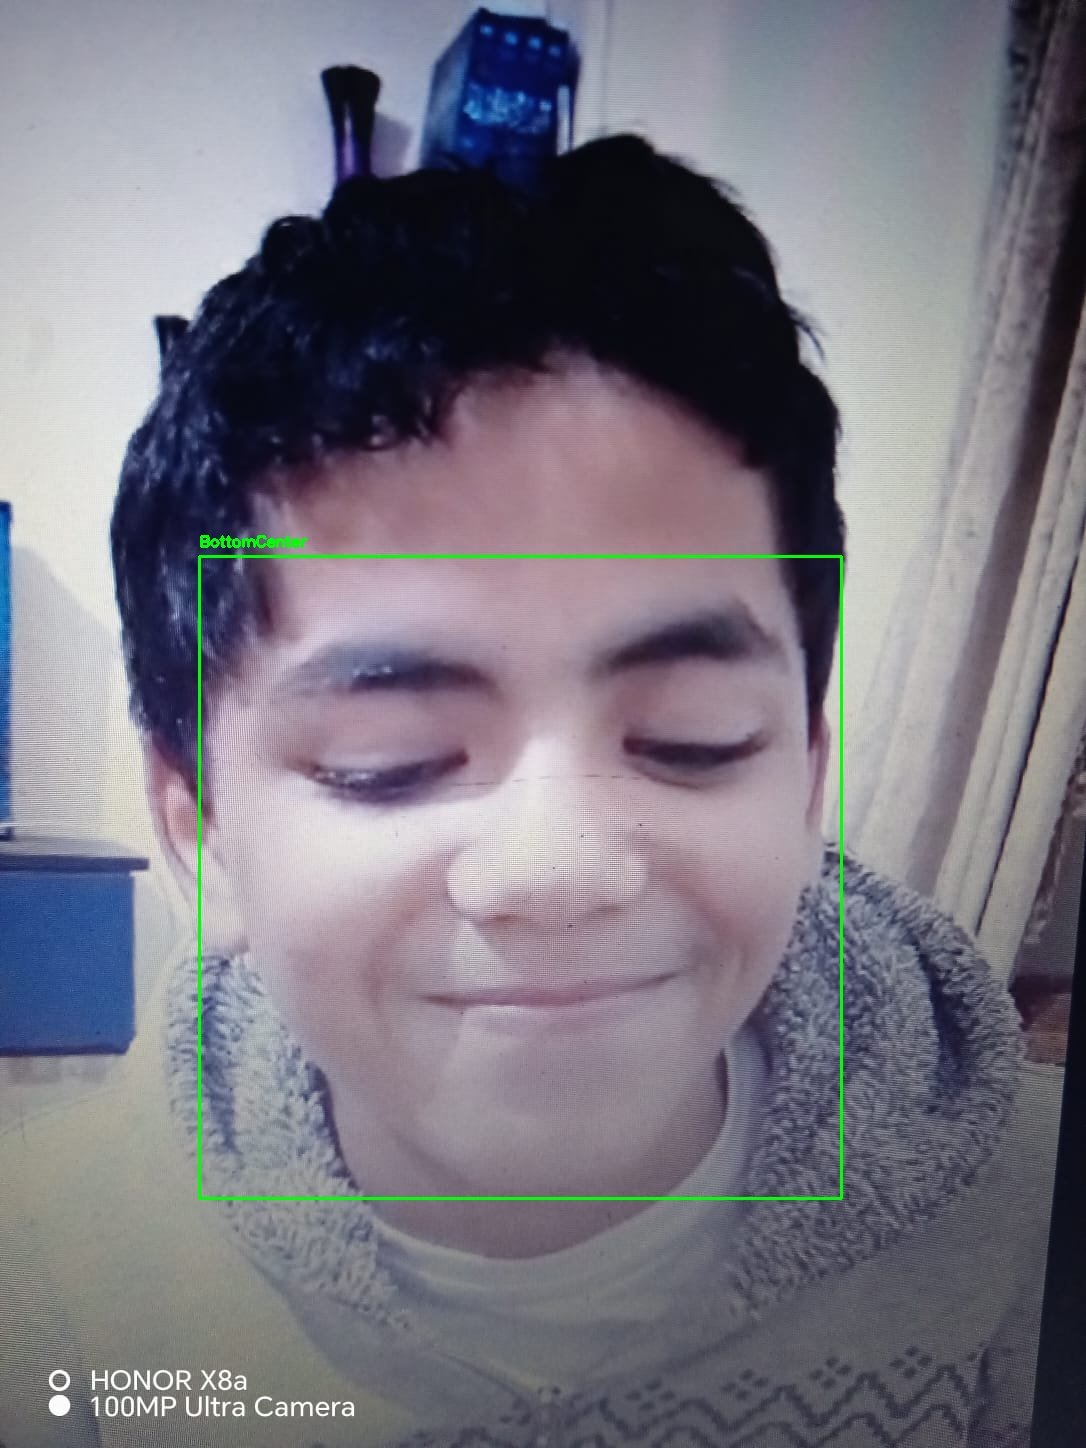

In [9]:
import cv2
import dlib
import numpy as np
from joblib import load
from IPython.display import Image

# Load the saved SVM model
model_path = "/kaggle/working/svm_model_eye.joblib"

# Load the face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")

# Load the image
image_path = "/kaggle/input/direction/close.jpeg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(gray)

for idx, face in enumerate(faces):
    # Get the landmarks for the face
    landmarks = predictor(gray, face)
    
    # Get the points for the left eye
    left_eye_pts = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)]
    left_eye_pts = np.array(left_eye_pts)
    
    # Find the bounding box for the left eye
    left_eye_x, left_eye_y, left_eye_w, left_eye_h = cv2.boundingRect(left_eye_pts)
    
    # Crop the left eye region from the image
    left_eye_image = gray[left_eye_y:left_eye_y+left_eye_h, left_eye_x:left_eye_x+left_eye_w]
    
    # Resize the left eye image to 100x100 pixels
    left_eye_image_resized = cv2.resize(left_eye_image, (100, 100))
    
    # Flatten the left eye image for prediction
    left_eye_flattened = left_eye_image_resized.flatten()
    
    # Make a prediction using the loaded SVM model
    prediction = svm.predict([left_eye_flattened])[0]
    
    # Map the predicted label to its corresponding class
    label_map = {
            0: "TopLeft",
            1: "TopCenter",
            2: "TopRight",
            3: "MiddleLeft",
            4: "MiddleRight",
            5: "BottomLeft",
            6: "BottomCenter",
            7: "BottomRight"
        }
    predicted_class = label_map.get(prediction, "other_direction")
    
    # Display the predicted class on the image
    cv2.putText(image, predicted_class, (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

    # Print the classification result for the current face
    print(f"Face {idx + 1} - Classification Result: {predicted_class}")

# Save the annotated image to a file
output_path = "/kaggle/working/annotated_image.jpg"
cv2.imwrite(output_path, image)

# Display the annotated image using IPython.display.Image
Image(filename=output_path)
